In [2]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_mirror
from automation import optimize_many_shapes
from importlib import reload
import asyncio

In [31]:
mir = ElecLens("/home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec01_30kV_nocurve.dat")
mir.mirror_type(mirror=True,curved_mirror=True)
mir.write("/home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec01_30kV_test.dat")
col = OpticalColumn(mir)

Reading file /home/trh/data/mirror/open_end/5elec/30kV/openendmir5elec01_30kV_nocurve.dat 
with title: mirror3.dat - test mirror 3
Warning! This data file seems to have curvature coordinates. Setting so=True.


In [119]:
img_pos = 84.706898+25
# col.use_mir_img_cond_file("/home/trh/data/mirror/5elec/30kV/mir_curved5_col00_retracing_30kV.dat")
col.write_mir_img_cond_file("/home/trh/data/mirror/open_end/5elec/30kV/mir_curved5_col00_30kV_test.dat",
                            turning_point=5,source_pos=img_pos-0.001,img_pos=img_pos,energy=30000,
                           potentials=MirPotentials(mir,[-500,-1000,2500,6410.83,10944.1,30000],['f','f','v1','f','f','f']))
# mir.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(mir,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# mir.calc_rays()
mir.calc_field()
# calc_properties_mirror(mir,col)

optical_element_io:calc_field:1151: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


       SOELENS Module    For Computing Potential Distribution
       ---------------   ------------------------------------
                         of Elect

In [102]:
col.read_mir_optical_properties(raytrace=True)

UnboundLocalError: local variable 'linenum_mag' referenced before assignment

In [103]:
col.c3

AttributeError: 'OpticalColumn' object has no attribute 'c3'

In [7]:
col.potentials

In [122]:
col.write_raytrace_file("/home/trh/data/mirror/5elec/30kV/mir_curved5_col00_30kV_rays_test.dat",
                            minimum_rays=True,source_pos=img_pos-0.001,screen_pos=img_pos,energy=30000,
                           potentials=col.potentials)
                        # can also explicitly define potentials here:
                        # MirPotentials(mir,[-500,1583.98,6410.83,10944.1,30000],['f','v1','f','f','f']))
col.calc_rays()

column_io:calc_rays:111: 

     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
        

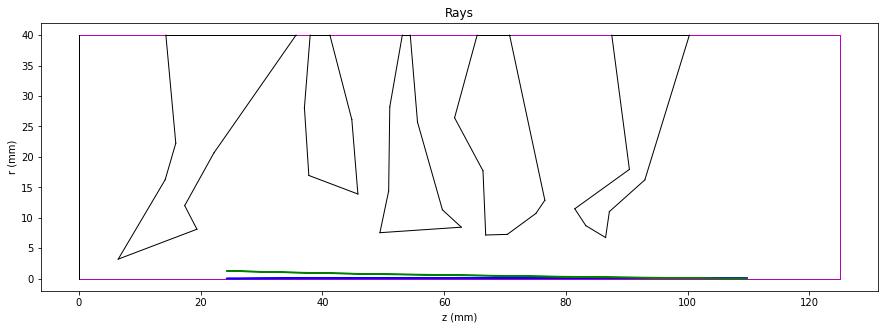

In [123]:
col.plot_rays(coarse_mesh=False,boundary_mesh=True) #savefile='/home/trh/data/mirror/open_end/5elec/30kV/old_mir_rays.png')

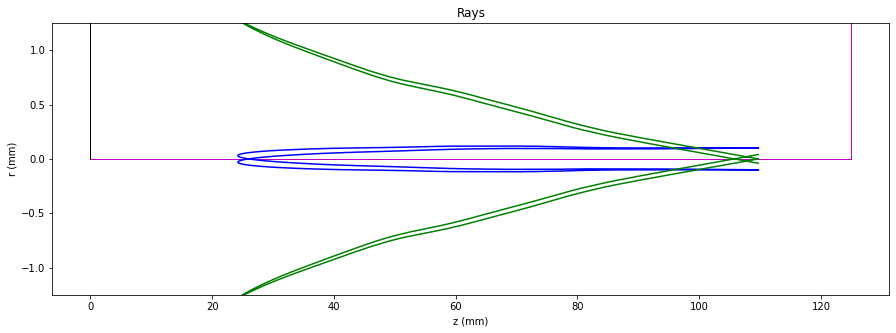

In [124]:
col.plot_rays(ylim=[-1.25,1.25],equal_aspect=False,coarse_mesh=False,boundary_mesh=True,mirror=True) #savefile='/home/trh/data/mirror/open_end/5elec/30kV/old_mir_only_rays.png')